In [20]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

num_classes = 81
img_rows, img_cols = 32, 32
batch_size = 16

from keras.preprocessing.image import ImageDataGenerator

train_data_dir = r'C:\Users\ASK Computers\Desktop\CV Projects\DeepLearningCV\fruits-360\Training'
validation_data_dir = r'C:\Users\ASK Computers\Desktop\CV Projects\DeepLearningCV\fruits-360\Test'

# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 41322 images belonging to 81 classes.
Found 13877 images belonging to 81 classes.


In [21]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization

In [23]:
model = Sequential([
    
    Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape= (img_rows, img_cols, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.20),
             
    Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.30),
    
    
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(81, activation = 'softmax')
    
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_42 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_43 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 16, 16, 128)     

In [26]:

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                     
checkpoint = ModelCheckpoint("Checkpoints/fruits_fresh_cnn_1.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)


callbacks = [earlystop, checkpoint, reduce_lr]


model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

nb_train_samples = 41322
nb_validation_samples = 13877
epochs = 10

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2582 steps, validate for 867 steps
Epoch 1/10
2581/2582 [============================>.] - ETA: 0s - loss: 0.3801 - accuracy: 0.8718
Epoch 00001: val_loss improved from inf to 0.57570, saving model to Checkpoints/fruits_fresh_cnn_1.h5
2582/2582 [==============================] - 785s 304ms/step - loss: 0.3800 - accuracy: 0.8718 - val_loss: 0.5757 - val_accuracy: 0.8295
Epoch 2/10
2581/2582 [============================>.] - ETA: 0s - loss: 0.2823 - accuracy: 0.9038
Epoch 00002: val_loss improved from 0.57570 to 0.21660, saving model to Checkpoints/fruits_fresh_cnn_1.h5
2582/2582 [==============================] - 981s 380ms/step - loss: 0.2822 - accuracy: 0.9038 - val_loss: 0.2166 - val_accuracy: 0.9301
Epoch 3/10
2581/2582 [============================>.] - ETA: 0s - loss: 0.2409 - accuracy: 0.9179
Epoch 00003: val_loss did not improve from 0.21660
2582/2582 [==============================] - 1156s 448ms/step - loss: 0.2408 -

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[109   0   0 ...   0   0   0]
 [  0 163   0 ...   0   0   0]
 [  0   0 164 ...   0   0   0]
 ...
 [  0   0   0 ... 164   0   0]
 [  0   0   0 ...   0 127   0]
 [  0   0   0 ...   0   0 249]]
Classification Report
                     precision    recall  f1-score   support

     Apple Braeburn       0.41      0.66      0.50       164
     Apple Golden 1       0.96      0.99      0.98       164
     Apple Golden 2       1.00      1.00      1.00       164
     Apple Golden 3       0.99      0.80      0.89       161
 Apple Granny Smith       0.84      1.00      0.91       164
        Apple Red 1       0.88      1.00      0.94       164
        Apple Red 2       1.00      0.06      0.11       164
        Apple Red 3       1.00      0.84      0.91       144
Apple Red Delicious       1.00      1.00      1.00       166
   Apple Red Yellow       1.00      0.94      0.97       164
            Apricot       1.00      1.00      1.00       164
            Avocado       1.00      

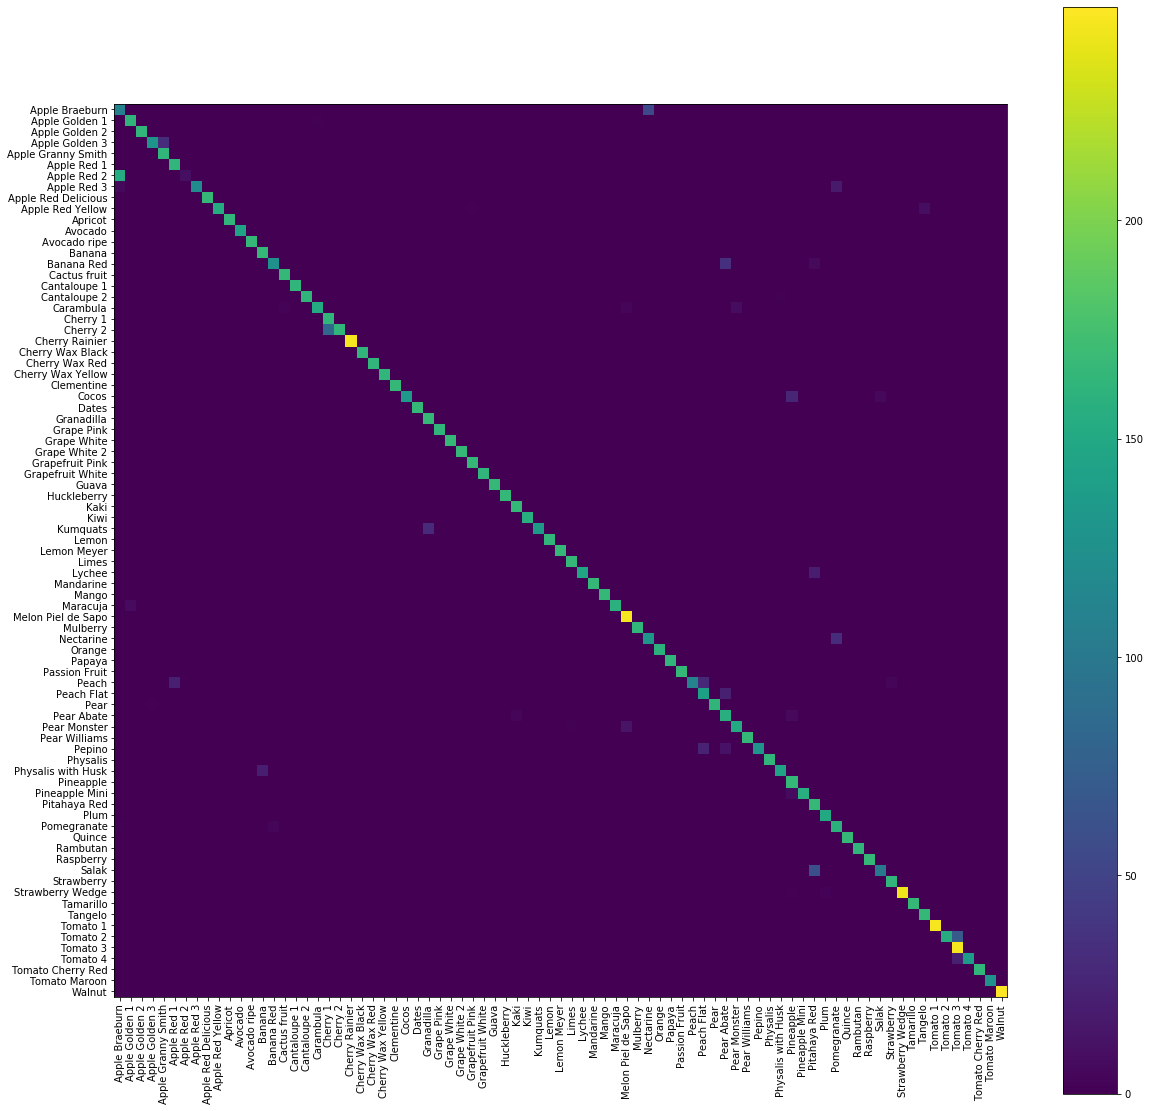

In [30]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 32,32,3
#model = load_model('/Checkpoints/fruits_fresh_cnn_1.h5')

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 41322
nb_validation_samples = 13877

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)